# Programming Assignment 2
## "Draining the reservoir"
<!-- Licensed under (CC BY 4.0) Gert Herold, 2021 -->

Insert the names of the group members here:
  
  * George Kouris
  * Xinchen Yao

Due to repair work on the retaining wall of a water reservoir, the water is to be drained. The lake has a capacity of $V_0=215 \cdot 10^6\,\text{m}^3$. The surface area of the reservoir extends over $10\,\text{km}^2$. The water outlet at the bottom of the lake has a cross-section of $2\,\text{m}^2$. The river itself is diverted so that currently no water can flow into the lake.

**1) Assume that the shape of the lake can be approximated by an upside-down [cone](https://en.wikipedia.org/wiki/Cone). How deep is the lake?** _(Note: The outlet cross-section is so small in relation to the surface that the cone can be assumed to be pointed.)_

In [1]:
volume=215*10**6 # in cubic meters
surface_area=10**7 # in square meters
height=3*volume/surface_area #in meters
print("The lake is", height,"meters deep.")

The lake is 64.5 meters deep.


For the sake of simplicity, it is assumed that the developing flow can be described with the help of the [Bernoulli equation](https://en.wikipedia.org/wiki/Bernoulli%27s_principle):


$$
\frac{u^2}{2}+\frac{p}{\rho}+g \, z = \text{const}
$$

with

|||
|-|-|
|$u$ | flow speed of the water |
|$p$ | hydrodynamic pressure| 
|$\rho$| density of water |
|$z$ | elevation above a reference plane |
|$g=9{,}81\frac{\text{m}}{\text{s}^2}$ | gravitational acceleration| 

If only the lake surface and the outlet are considered, the pressure $p$ can also be assumed to be constant, as it corresponds to the ambient pressure. Likewise, the density is assumed to be constant, and the above equation simplifies to 

$$
\frac{u^2}{2}+g \, z = \text{const}
$$

i.e. for top and bottom:

$$
\frac{u_\text{top}^2}{2}+g \, z_\text{top} = \frac{u_\text{bottom}^2}{2}+g \, z_\text{bottom}
$$

The reference point for the $z$ values can be chosen arbitrarily. 
Let the depth $h$ of the lake be defined as the difference between the height of the surface and the height of the outlet:

$$
h = z_\text{top} - z_\text{bottom}
$$

**2) Calculate the initial flow velocity at the outlet $u_\text{bottom,0}$ and the volumetric flow $\dot{V_0}$ assuming that the movement of the lake surface is negligible.**

In [2]:
g=9.81 # in m/s^2
bottom_area=2 # in square meters
u_bottom_0=(2*g*height)**0.5   # initial flow velocity at the bottom, in m/s
volumetric_flow=bottom_area*u_bottom_0  # volumetric flow (at the bottom), in m^3/s
print('The initial flow velocity at the outlet is %.2f meters per second.\nThe volumetric flow is %.2f cubic meters per second.' % (u_bottom_0, volumetric_flow))

The initial flow velocity at the outlet is 35.57 meters per second.
The volumetric flow is 71.15 cubic meters per second.


Tip: To be able to use the constant $\pi$ under Python, you must either define it yourself or import it, e.g. from the [NumPy module](https://numpy.org/). For an example, open the following code section.

In [3]:
# import pi from numpy
#from numpy import pi

# calculate "radius" of the lake surface
#r0 = (A0/pi)**0.5
#print(f'radius: {r0/1000:.2f} km')

**3) Write a function that determines and returns the depth of the "cone" lake in general depending on the amount of water $V$ it contains.** _(Note that the shape of the lake [does not change](https://en.wikipedia.org/wiki/Intercept_theorem) and thus the value given above for the surface area only applies when the lake is full.)_

In [4]:
from numpy import pi
surface_radius=(surface_area/pi)**0.5 # in meters
const=surface_radius/height

def depth(V):  # depth: in meters, V: in cubic meters
    depth=(3*V/(pi*const**2))**(1/3)
    return(round(depth, 2))
    
vol=input("What's the volume of the lake (in cubic meters) at the moment?")
print('The lake with %.2f cubic meters of water is %.2f meters deep.' % (float(vol), depth(float(vol))))

**4) Write a function which, starting from the volume $V_0$ and a given time step $\Delta t$, returns the discrete time history of the water depth $h(t)$ until the lake is emptied. Note that the volume flow also changes in time.** *(The change in volume can be approximated by $V_{n+1}=V_n-\dot{V_n} \cdot \Delta t$.)*.

In [ ]:
def drain_it(V0, dt): # in cubic meters and seconds
    t_list=[] # in seconds
    h_list=[] # in meters
    volume=V0 # in cubic meters
    counter=0
    while (volume>=0):
        t_list+=[counter*dt]
        counter+=1
        depth_=depth(volume)
        h_list+=[depth_]
        new_flow_velocity=(2*g*depth_)**0.5 # in meters per second
        volumetric_flow=bottom_area*new_flow_velocity # in cubic meters per second
        volume-=volumetric_flow*dt # in cubic meters
    return t_list, h_list
dt=input("How long is the time step?")
(x,y)=drain_it(215000000, int(dt))
print("The time step list:\n", x,"\nThe height history list:\n", y)

How long is the time step? 345600


The time step list:
 [0, 345600, 691200, 1036800, 1382400, 1728000, 2073600, 2419200, 2764800, 3110400, 3456000] 
The height history list:
 [64.5, 61.94, 59.21, 56.27, 53.07, 49.55, 45.59, 41.01, 35.44, 27.92, 11.61]


**5) How long does it take for the reservoir to be completely drained?**
  * Plot the time progression of water depth to emptying for two time increments:
    * $\Delta t_1$ = 1 minute
    * $\Delta t_2$ = 4 days
  * Draw both progressions in _one_ diagram and discuss noticeable features.

_Note: The lake also counts as empty if more water would run off in the next time step than is still contained in the lake._

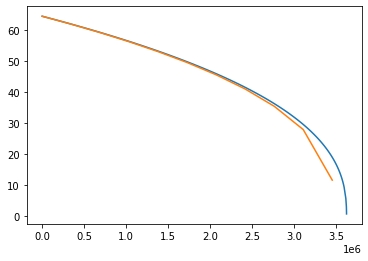

In [ ]:
%matplotlib inline
from matplotlib.pyplot import plot, show
# Plot command: plot(x_values_list, y_values_list)

(x,y)=drain_it(215000000, 60)
(a,b)=drain_it(215000000, 345600)
plot(x,y)
plot(a,b)
show()

**6) Repeat task 5), now assuming that the lake is approximately described by a *cylinder* with the same volume, the same surface area and the same outlet cross-section. Write as little new code as possible for this.**

_Note: The shape of the lake should only occur in the function `depth()`, i.e. you only need to change / redefine this._

In [ ]:
#height=volume/surface_area
def depth(V): # depth: in meters, V: in cubic meters
    depth=V/surface_area
    return(round(depth,2))
#(x,y)=drain_it(215000000, 60)
#(a,b)=drain_it(215000000, 345600)
#plot(x, y)
#plot(a, b)
#show()